In [1]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%pwd
import darknet

In [21]:
def save_boxImage(imagePath, boxes, path):
    cfg = './cfg/temp0922/yolov3-temp0925.cfg'
    weights = '/Users/suzaki/Sotuken/face_picture_and_tempmap/darknet/cfg/temp0922/backup/yolov3-temp0925_33000.weights'
    data = './cfg/temp0922/datasets.data'
    
    img = cv2.cvtColor(cv2.imread(imagePath), cv2.COLOR_BGR2RGB)
    for b in boxes:
        box = b[2]
        if b[1] > 0.8:
            center = (int(box[0]), int(box[1]))
            width = int(box[2])
            height = int(box[3])

            top_left = (center[0]-(width//2), center[1]-(height//2))
            btm_right = (center[0]+(width//2), center[1]+(height//2))

        #     top_left = (int(box[0]), int(box[1]))
        #     btm_right = (int(box[0]+box[2]), int(box[1]+box[3]))
            img = cv2.rectangle(img,top_left,btm_right,(0,255,0),1)
        cv2.imwrite(path, img)

In [22]:
img_dir = './cfg/temp0922/kari/dataset_detection/images/'
imgpath = './cfg/temp0922/temp0925/test.txt'
img_list = []
with open(imgpath) as f:
    data = f.read().splitlines()
    img_list = [d.split("/")[-1] for d in data ]
    
print(len(img_list), img_list[0])

115 1598605200.jpg


In [23]:
out_dir = './results/temp0925/'
cfg = './cfg/temp0922/yolov3-temp0925.cfg'
weights = '/Users/suzaki/Sotuken/face_picture_and_tempmap/darknet/cfg/temp0922/backup/yolov3-temp0925_33000.weights'
data = './cfg/temp0922/datasets.data'
for img in img_list:
    imgPath = img_dir+img
    out_path = out_dir + img
    boxes = darknet.detect_box(cfg.encode(), weights.encode(), data.encode(), imgPath.encode())
    save_boxImage(imgPath, boxes, out_path)

In [26]:
out_list = [f for f in os.listdir(out_dir) if f.endswith('.jpg')]
print(len(out_list))
print(out_list[:5])

115
['1598607766.jpg', '1598608333.jpg', '1598605165.jpg', '1598607773.jpg', '1598605172.jpg']


/Users/suzaki/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


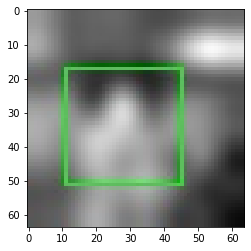

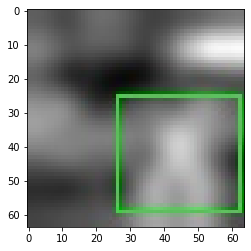

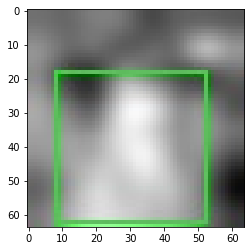

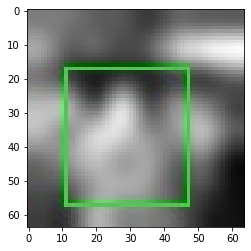

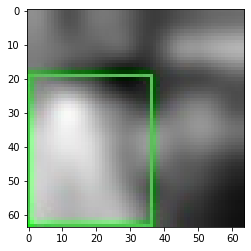

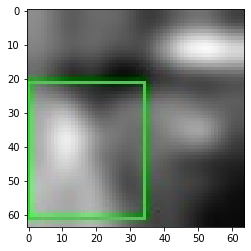

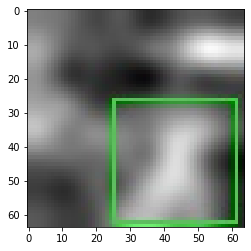

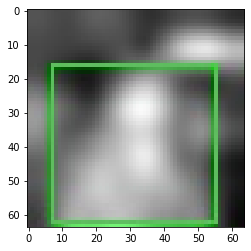

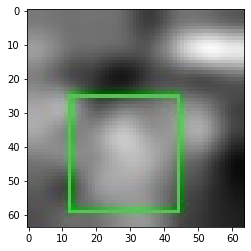

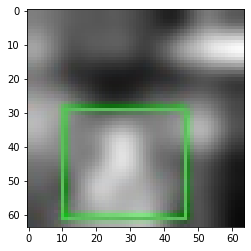

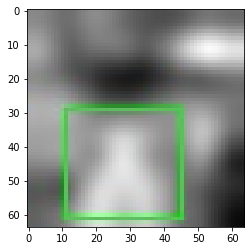

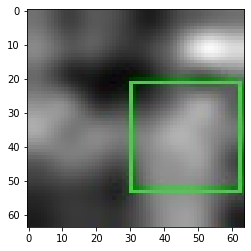

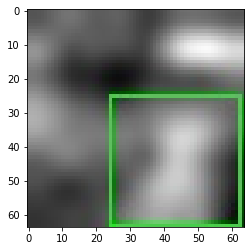

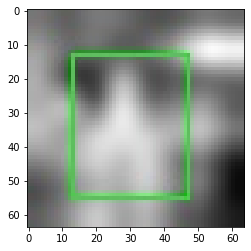

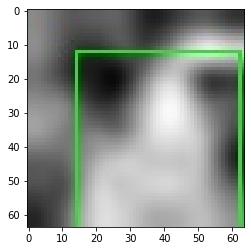

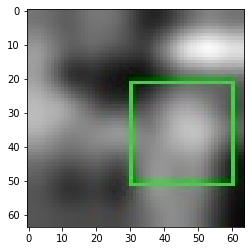

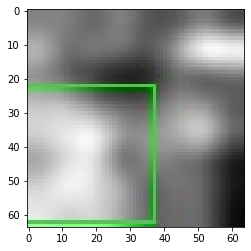

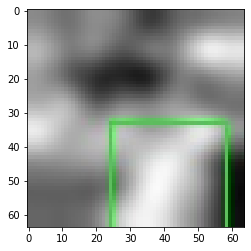

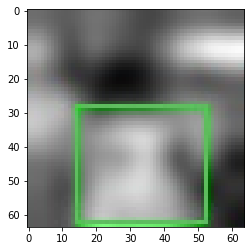

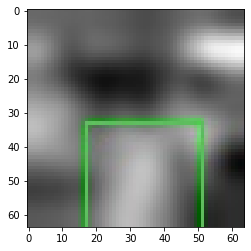

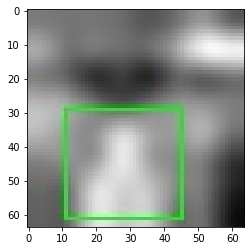

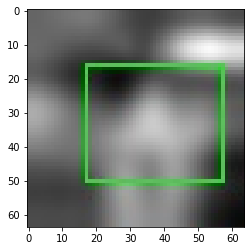

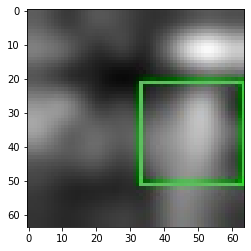

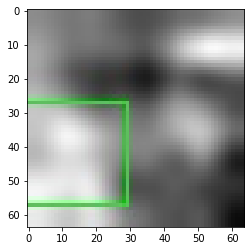

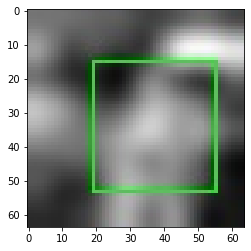

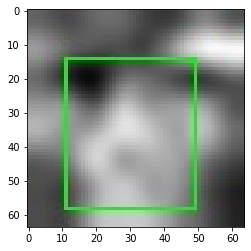

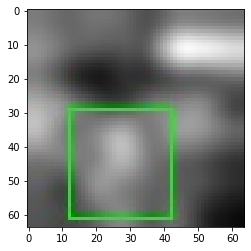

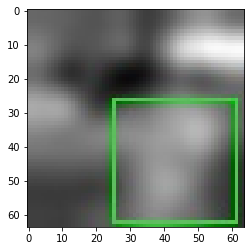

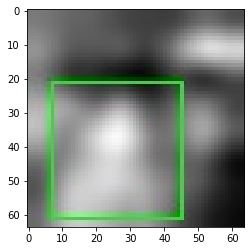

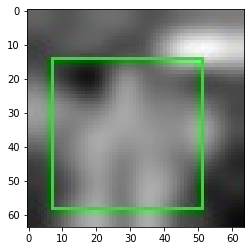

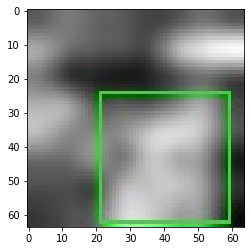

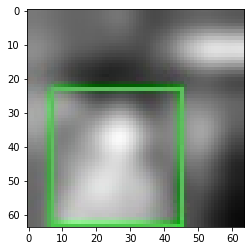

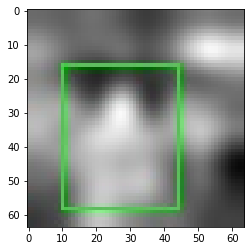

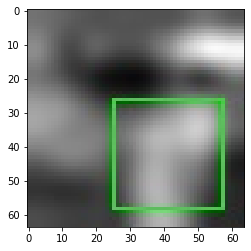

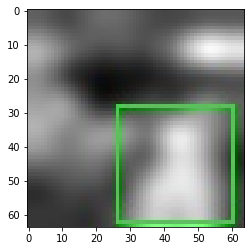

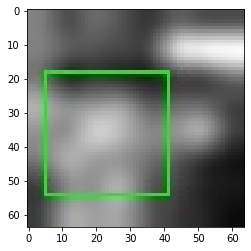

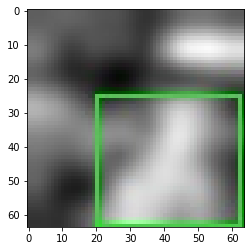

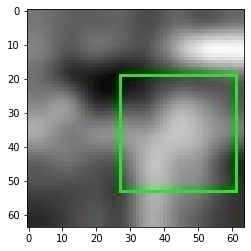

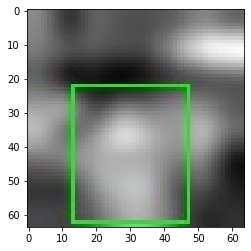

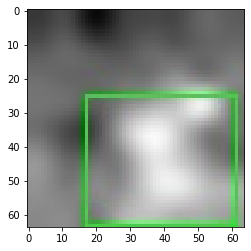

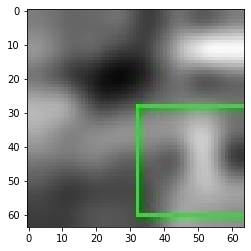

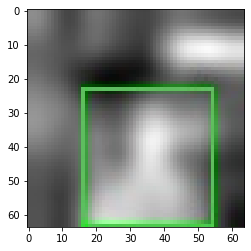

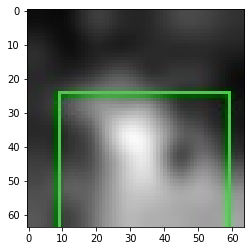

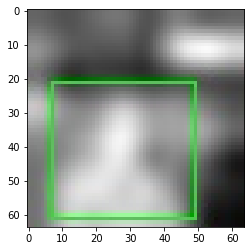

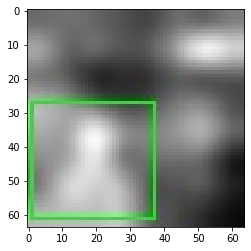

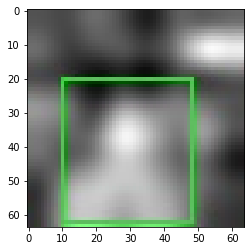

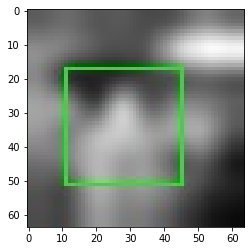

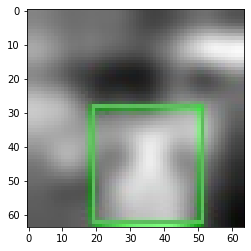

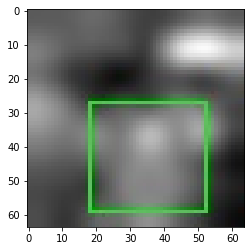

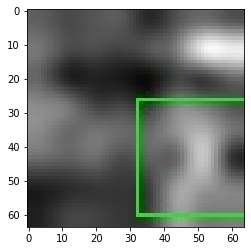

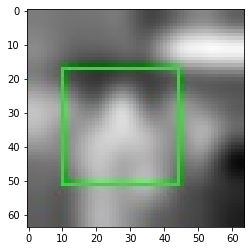

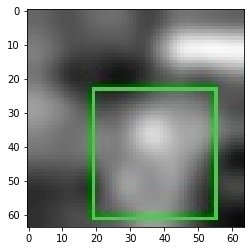

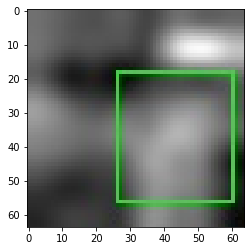

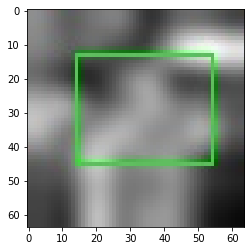

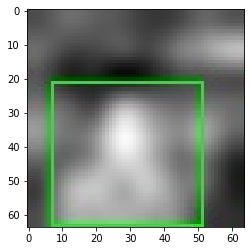

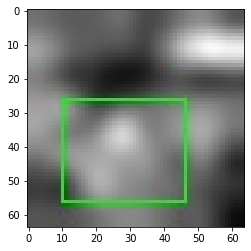

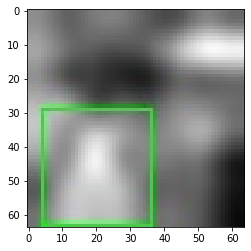

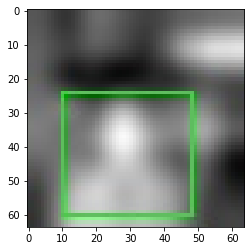

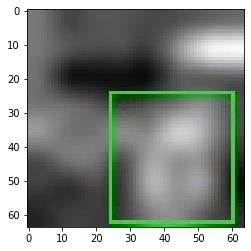

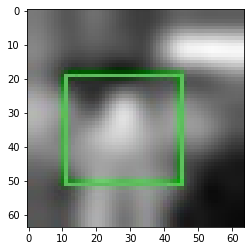

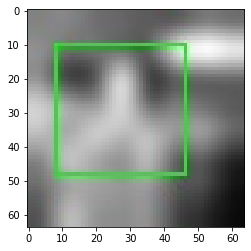

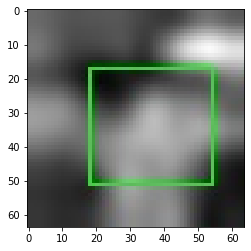

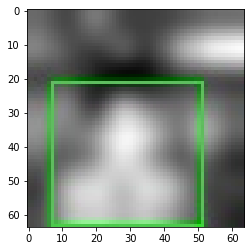

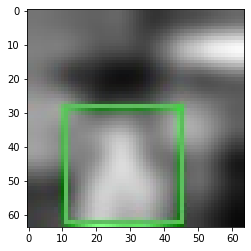

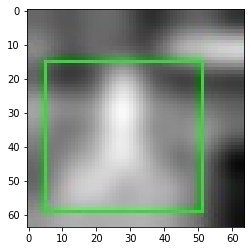

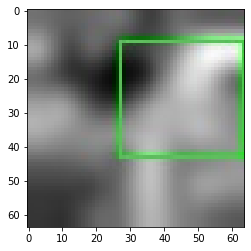

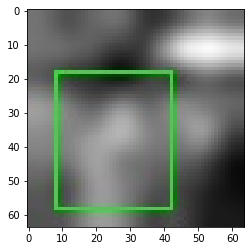

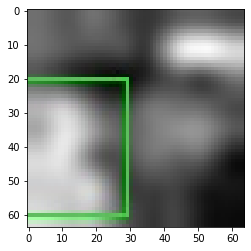

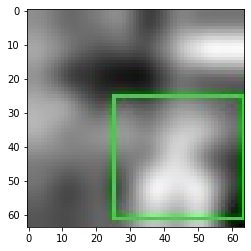

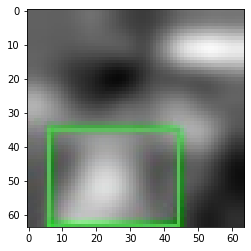

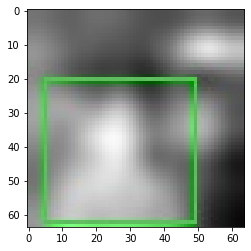

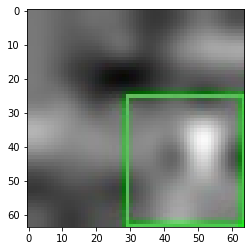

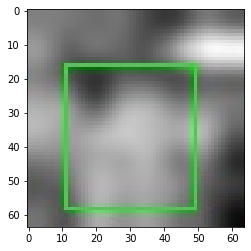

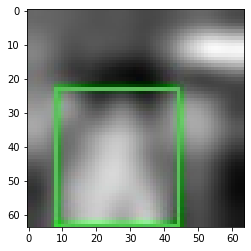

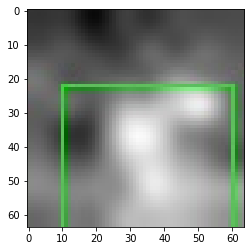

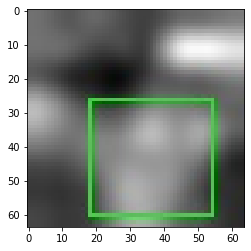

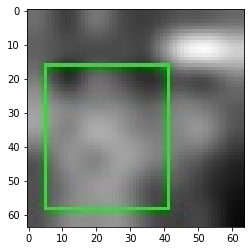

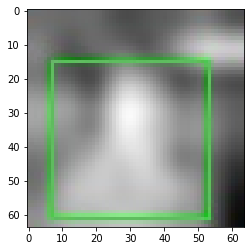

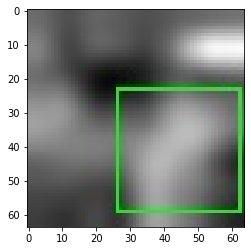

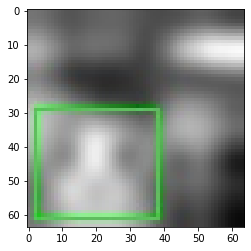

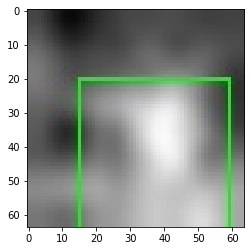

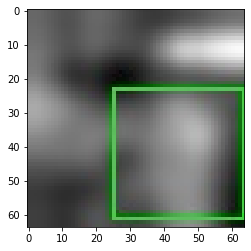

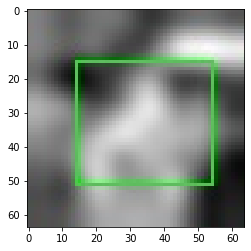

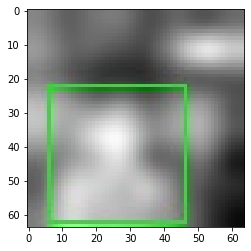

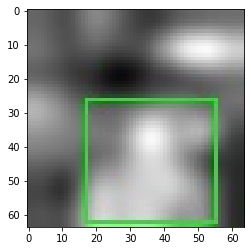

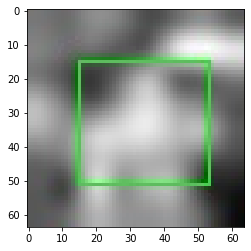

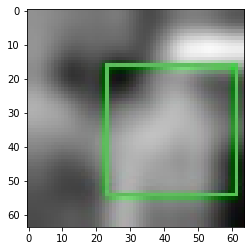

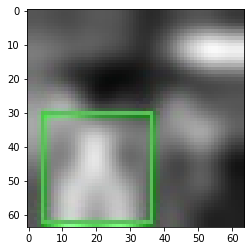

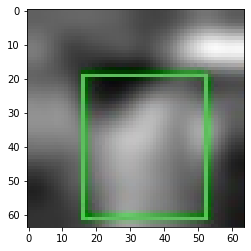

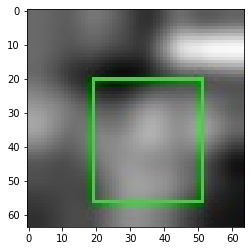

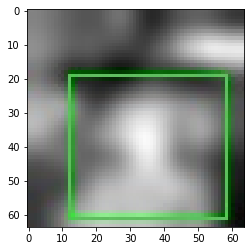

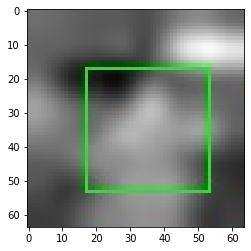

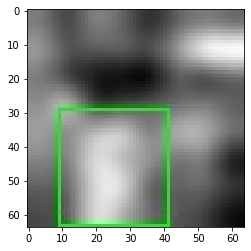

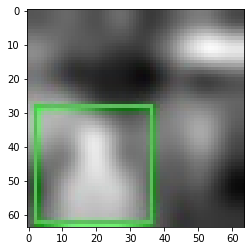

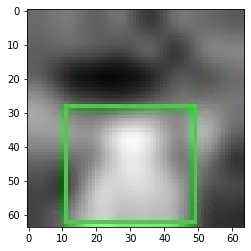

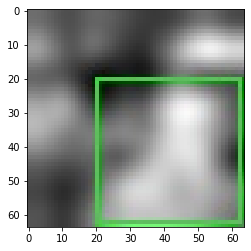

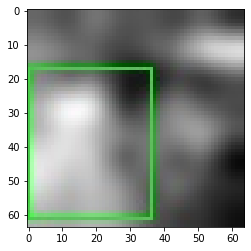

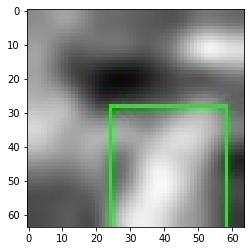

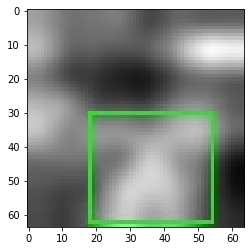

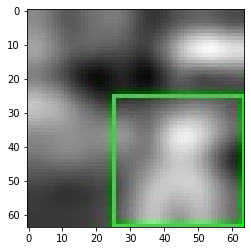

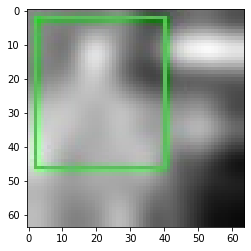

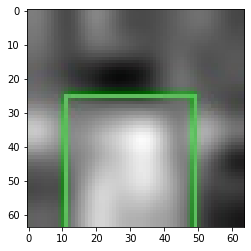

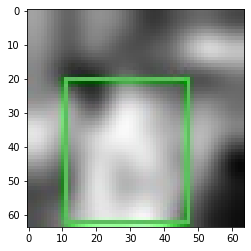

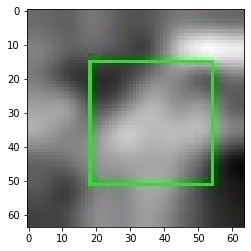

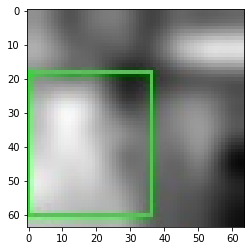

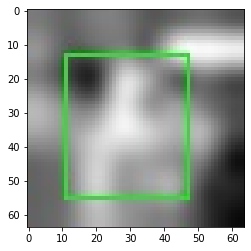

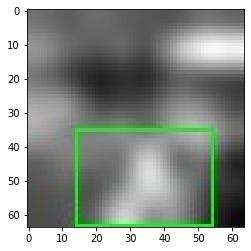

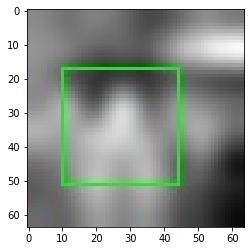

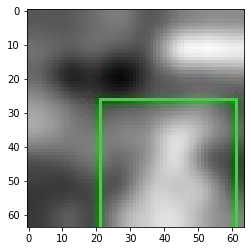

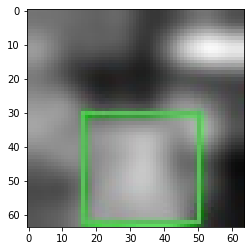

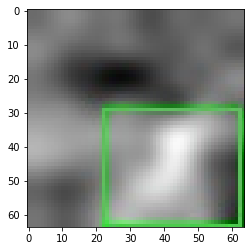

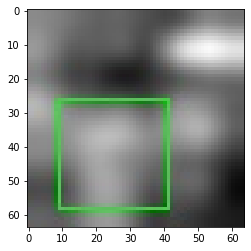

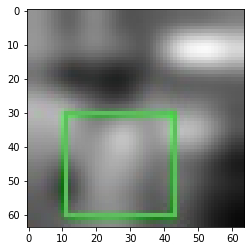

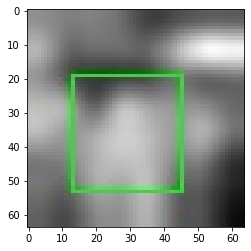

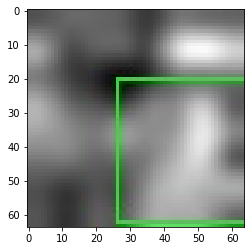

In [29]:
for out in out_list:
    im = cv2.cvtColor(cv2.imread(out_dir+out), cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(im)